### CSV Data Note: Single tracks. No state segments or continuing county info (e.g. sg="1")

In [1]:
#Install libraries and packages: 

!pip install pandas 
!pip install matplotlib
!pip install cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 929.2 kB/s eta 0:00:00 0:00:01
  Using cached numpy-2.3.3-cp311-cp311-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (62 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 54.8 MB/s eta 0:00:00:00:01:01
Using cached numpy-2.3.3-cp311-cp311-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl (16.9 MB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)
  Using cached matplotlib-3.10.6-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
  Using cached contourpy-1.3.3-cp311-cp311-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.3/112.3 kB 2.8 MB/s eta 0:00:00a 0:00:01
  Using cached kiwisolver-1.4.9-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (6.3 kB)
  Using cached pil

In [3]:
#Import libraries and packages: 

import pandas as pd 
import matplotlib.pyplot as plt
import cartopy.crs as ccrs 
import cartopy.feature as cfeature

# Show all columns when printing DataFrames
pd.set_option("display.max_columns", None)

In [4]:
# Replace 'your_file.csv' with the actual filename or path
df = pd.read_csv("1950-2024_actual_tornadoes.csv")

# Display the first 5 rows
df.head()

,om,yr,mo,dy,date,time,tz,st,stf,stn,mag,inj,fat,loss,closs,slat,slon,elat,elon,len,wid,ns,sn,sg,f1,f2,f3,f4,fc
0,192,1950,10,1,1950-10-01,21:00:00,3,OK,40,23,1,0,0,4.0,0.0,36.73,-102.52,36.88,-102.3,15.8,10,1,1,1,25,0,0,0,0
1,193,1950,10,9,1950-10-09,02:15:00,3,NC,37,9,3,3,0,5.0,0.0,34.17,-78.60,0.00,0.0,2.0,880,1,1,1,47,0,0,0,0
2,195,1950,11,20,1950-11-20,02:20:00,3,KY,21,1,2,0,0,5.0,0.0,37.37,-87.20,0.00,0.0,0.1,10,1,1,1,177,0,0,0,0
3,196,1950,11,20,1950-11-20,04:00:00,3,KY,21,2,1,0,0,5.0,0.0,38.20,-84.50,0.00,0.0,0.1,10,1,1,1,209,0,0,0,0
4,197,1950,11,20,1950-11-20,07:30:00,3,MS,28,14,1,3,0,4.0,0.0,32.42,-89.13,0.00,0.0,2.0,37,1,1,1,101,0,0,0,0


In [5]:
# Keep only rows where state is Iowa, Missouri, or Illinois
df_filtered = df[df["st"].isin(["IA", "MO", "IL"])]

# Show first 5 rows of the filtered DataFrame
df_filtered

,om,yr,mo,dy,date,time,tz,st,stf,stn,mag,inj,fat,loss,closs,slat,slon,elat,elon,len,wid,ns,sn,sg,f1,f2,f3,f4,fc
6,198,1950,12,2,1950-12-02,15:00:00,3,IL,17,7,2,3,1,4.0,0.0,38.9700,-90.0500,39.0700,-89.7200,18.80,50,1,1,1,119,117,0,0,0
7,199,1950,12,2,1950-12-02,16:00:00,3,IL,17,8,3,25,2,6.0,0.0,38.7500,-89.6700,38.9000,-89.3800,18.00,200,1,1,1,119,5,0,0,0
9,201,1950,12,2,1950-12-02,17:30:00,3,IL,17,9,1,0,0,4.0,0.0,38.1700,-89.7800,38.2200,-89.6200,9.60,50,1,1,1,157,0,0,0,0
11,5,1950,1,25,1950-01-25,19:30:00,3,MO,29,2,2,5,0,5.0,0.0,37.6000,-90.6800,37.6300,-90.6500,2.30,300,1,1,1,93,0,0,0,0
12,6,1950,1,25,1950-01-25,21:00:00,3,IL,17,3,2,0,0,5.0,0.0,41.1700,-87.3300,0.0000,0.0000,0.10,100,1,1,1,91,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71703,624811,2024,8,5,2024-08-05,18:43:00,3,IA,19,0,-9,0,0,0.0,500.0,43.4269,-93.0766,43.4251,-93.0762,0.12,20,1,1,1,195,0,0,0,0
71704,624812,2024,8,5,2024-08-05,18:43:00,3,IA,19,0,-9,0,0,0.0,1000.0,43.4289,-93.0595,43.4184,-93.0511,0.84,30,1,1,1,195,0,0,0,0
71712,624820,2024,8,5,2024-08-05,20:57:00,3,IA,19,0,0,0,0,0.0,10000.0,43.3920,-91.8930,43.3940,-91.8870,0.33,30,1,1,1,191,0,0,0,0
71713,624821,2024,8,5,2024-08-05,21:11:00,3,IA,19,0,0,0,0,5000.0,25000.0,43.3900,-91.7700,43.3800,-91.7500,0.98,80,1,1,1,191,0,0,0,0


In [6]:
# Count number of rows per state
state_counts = df_filtered["st"].value_counts()

print(state_counts)

st
IA    3011
IL    2974
MO    2555
Name: count, dtype: int64


In [7]:
# Group by year and state, count rows
state_year_counts = df_filtered.groupby(["yr", "st"]).size().reset_index(name="Count")

print(state_year_counts)

       yr  st  Count
0    1950  IA      4
1    1950  IL      8
2    1950  MO      6
3    1951  IA      5
4    1951  IL      5
..    ...  ..    ...
220  2023  IL    118
221  2023  MO     21
222  2024  IA    124
223  2024  IL    139
224  2024  MO     93

[225 rows x 3 columns]


In [8]:
# Find the year(s) corresponding to the max count per state
idx = state_year_counts.groupby("st")["Count"].idxmax()
max_counts_with_year = state_year_counts.loc[idx].reset_index(drop=True)

print(max_counts_with_year)

     yr  st  Count
0  2024  IA    124
1  2024  IL    139
2  2006  MO     96


In [9]:
#Tornado counts per season per year (combined for the three states of interest)

# Start from filtered dataset
df_filtered = df[df["st"].isin(["IA", "MO", "IL"])].copy()

# Adjust year so December counts toward the next year's winter
df_filtered["season_year"] = df_filtered["yr"]
df_filtered.loc[df_filtered["mo"] == 12, "season_year"] += 1

In [10]:
# Assign season labels
def get_season(m):
    if m in [12, 1, 2]:
        return "DJF"
    elif m in [3, 4, 5]:
        return "MAM"
    elif m in [6, 7, 8]:
        return "JJA"
    else:
        return "SON"

df_filtered["season"] = df_filtered["mo"].apply(get_season)

In [11]:
# Count tornadoes by season_year and season
season_counts = (
    df_filtered.groupby(["season_year", "season"])
    .size()
    .reset_index(name="tornado_count")
)

In [12]:
# Remove DJF 1950 (partial season)
mask = ~((season_counts["season_year"] == 1950) & (season_counts["season"] == "DJF"))

# Remove DJF 2025 (partial season)
mask &= ~((season_counts["season_year"] == 2025) & (season_counts["season"] == "DJF"))

season_counts_clean = season_counts[mask]

# Pivot again with correct column order
season_pivot = (
    season_counts_clean
    .pivot(index="season_year", columns="season", values="tornado_count")
    .fillna(0)
)

# Reorder to DJF, MAM, JJA, SON
season_pivot = season_pivot[["DJF", "MAM", "JJA", "SON"]]

# Convert seasonal counts to integers
season_pivot = season_pivot.astype(int)

print(season_pivot)

season       DJF  MAM  JJA  SON
season_year                    
1950           0    3    8    0
1951           3    1   11    3
1952           2   10    6    2
1953           0   20   13    0
1954           0   46    8    3
...          ...  ...  ...  ...
2020           7   54   41    9
2021           0   34   94   27
2022          83   68   21    2
2023          19  122   65    5
2024          12  224  109    9

[75 rows x 4 columns]


In [13]:
# Sum tornado counts across all years, by season
season_pivot.sum()

season
DJF     589
MAM    4107
JJA    2993
SON     845
dtype: int64

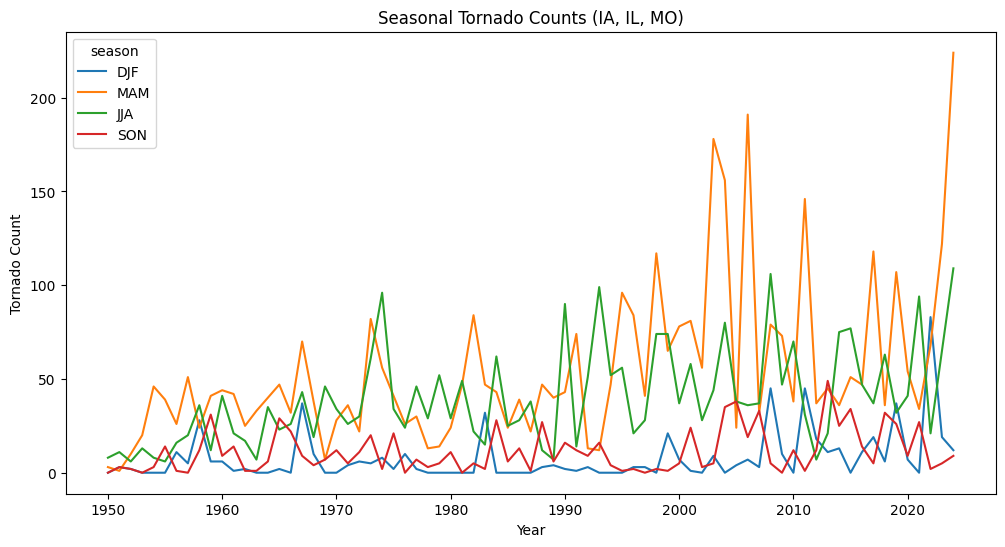

In [14]:
#Creating a time series plot of seasonal tornado count

season_pivot.plot(figsize=(12,6), title="Seasonal Tornado Counts (IA, IL, MO)")
plt.xlabel("Year")
plt.ylabel("Tornado Count")
plt.show()

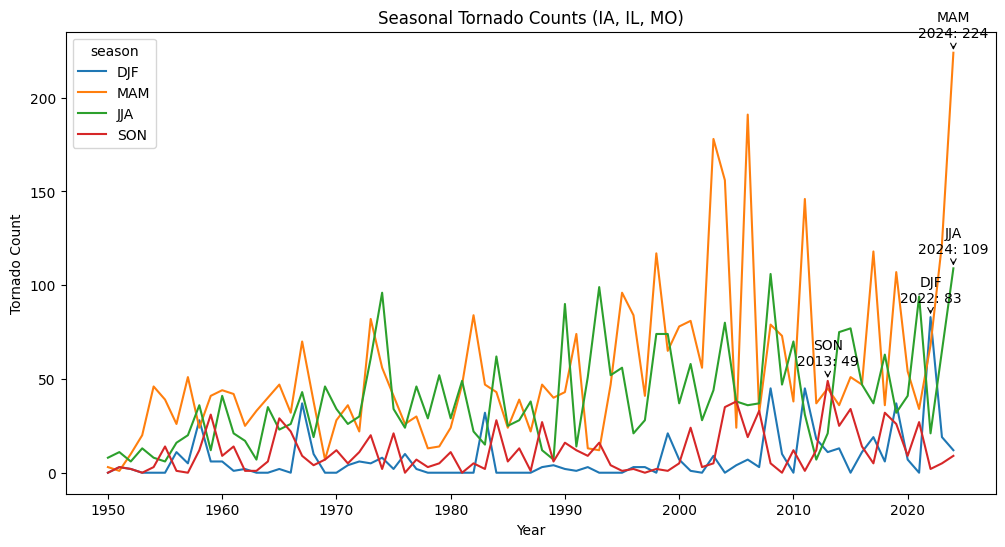

In [15]:
# Plot the time series
ax = season_pivot.plot(figsize=(12,6), title="Seasonal Tornado Counts (IA, IL, MO)")
plt.xlabel("Year")
plt.ylabel("Tornado Count")

# Annotate the maximum point for each season
for season in season_pivot.columns:
    # Find year and value of the max
    max_year = season_pivot[season].idxmax()
    max_value = season_pivot[season].max()
    
    # Add annotation with year and count
    ax.annotate(f"{season}\n{max_year}: {max_value}", 
                xy=(max_year, max_value), 
                xytext=(max_year, max_value+8),  # shift text upward
                arrowprops=dict(facecolor='black', arrowstyle="->", lw=0.8),
                ha='center')

plt.show()

In [16]:
#Now onto 2-D plotting of tornado tracks across the three states of interest: IA, MO, and IL
#For valid tornado tracks with BOTH a starting lat/lon and ending lat/lon. Can add in tornadoes with just a starting lat/lon later. 

# Filter for 2024 tornadoes and valid coordinates
tracks_2024 = df_filtered[(df_filtered["yr"] == 2024)].dropna(subset=["slat", "slon", "elat", "elon"])

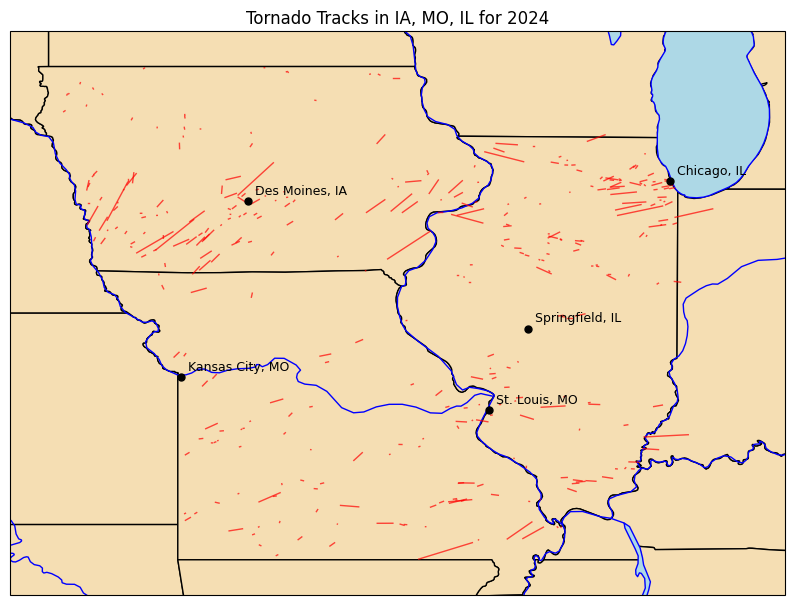

In [17]:
# Define major cities (lat, lon)
cities = {
    "Des Moines, IA": (41.5868, -93.6250),
    "Kansas City, MO": (39.0997, -94.5786),
    "St. Louis, MO": (38.6270, -90.1994),
    "Chicago, IL": (41.8781, -87.6298),
    "Springfield, IL": (39.7817, -89.6501)
}

# Set up the map (focused on IA, MO, IL region)
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add background features
ax.add_feature(cfeature.STATES.with_scale("10m"), facecolor="wheat", edgecolor="black")
ax.add_feature(cfeature.BORDERS, linestyle=":")
ax.coastlines("50m")

# Add major rivers (Mississippi included)
rivers = cfeature.NaturalEarthFeature(
    category='physical', 
    name='rivers_lake_centerlines', 
    scale='50m',
    facecolor='none')
ax.add_feature(rivers, edgecolor='blue', linewidth=1)

# Add lakes (Lake Michigan, etc.) with blue fill
lakes = cfeature.NaturalEarthFeature(
    category='physical',
    name='lakes',
    scale='50m',
    facecolor='lightblue')
ax.add_feature(lakes, edgecolor='blue')

# Plot tornado tracks
for _, row in tracks_2024.iterrows():
    ax.plot([row["slon"], row["elon"]], 
            [row["slat"], row["elat"]],
            color="red", linewidth=1, alpha=0.7,
            transform=ccrs.PlateCarree())

# Plot cities
for city, (lat, lon) in cities.items():
    ax.plot(lon, lat, marker="o", color="black", markersize=5, transform=ccrs.PlateCarree())
    ax.text(lon + 0.1, lat + 0.1, city, fontsize=9, transform=ccrs.PlateCarree())

# Zoom to Midwest (IA, MO, IL roughly)
ax.set_extent([-97, -86, 36, 44], crs=ccrs.PlateCarree())

plt.title("Tornado Tracks in IA, MO, IL for 2024")
plt.show()

In [20]:
#Now creating a 2-D map to visualize tornado tracks by season for the time period 2019-2024. 

# Filter for tornadoes from 2019–2024 and valid coordinates
tracks_period = df_filtered[(df_filtered["yr"] >= 2019) & (df_filtered["yr"] <= 2024)].dropna(subset=["slat", "slon", "elat", "elon"])

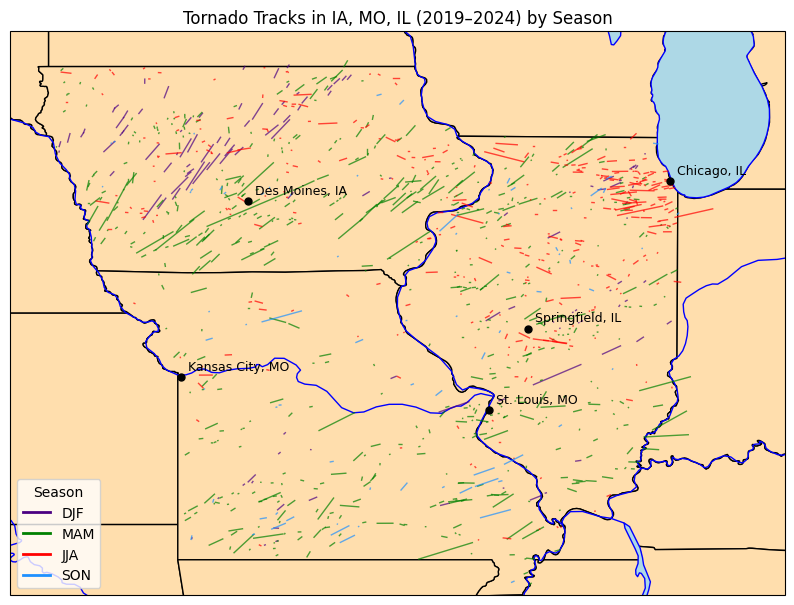

In [21]:
# Define season function
def get_season(m):
    if m in [12, 1, 2]:
        return "DJF"
    elif m in [3, 4, 5]:
        return "MAM"
    elif m in [6, 7, 8]:
        return "JJA"
    else:
        return "SON"

# Assign seasons
tracks_period["season"] = tracks_period["mo"].apply(get_season)

# Adjust year for December to include in next year’s DJF
tracks_period["season_year"] = tracks_period["yr"]
tracks_period.loc[tracks_period["mo"] == 12, "season_year"] += 1

# Define colors for seasons
season_colors = {
    "DJF": "indigo",
    "MAM": "green",
    "JJA": "red",
    "SON": "dodgerblue"
}

# Major cities
cities = {
    "Des Moines, IA": (41.5868, -93.6250),
    "Kansas City, MO": (39.0997, -94.5786),
    "St. Louis, MO": (38.6270, -90.1994),
    "Chicago, IL": (41.8781, -87.6298),
    "Springfield, IL": (39.7817, -89.6501)
}

# Set up the map
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection=ccrs.PlateCarree())

# States fill
ax.add_feature(cfeature.STATES.with_scale("10m"), facecolor="navajowhite", edgecolor="black")
ax.add_feature(cfeature.BORDERS, linestyle=":")
ax.coastlines("50m")

# Rivers and lakes
rivers = cfeature.NaturalEarthFeature(
    category='physical', name='rivers_lake_centerlines', scale='50m', facecolor='none')
ax.add_feature(rivers, edgecolor='blue', linewidth=1)

lakes = cfeature.NaturalEarthFeature(
    category='physical', name='lakes', scale='50m', facecolor='lightblue')
ax.add_feature(lakes, edgecolor='blue')

# Plot tornado tracks by season
for season, color in season_colors.items():
    season_tracks = tracks_period[tracks_period["season"] == season]
    for _, row in season_tracks.iterrows():
        ax.plot([row["slon"], row["elon"]],
                [row["slat"], row["elat"]],
                color=color, linewidth=1, alpha=0.7, transform=ccrs.PlateCarree())

# Plot cities
for city, (lat, lon) in cities.items():
    ax.plot(lon, lat, marker="o", color="black", markersize=5, transform=ccrs.PlateCarree())
    ax.text(lon + 0.1, lat + 0.1, city, fontsize=9, transform=ccrs.PlateCarree())

# Zoom to Midwest
ax.set_extent([-97, -86, 36, 44], crs=ccrs.PlateCarree())

# Add legend manually
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color=c, lw=2, label=s) for s, c in season_colors.items()]
ax.legend(handles=legend_elements, loc="lower left", title="Season")

plt.title("Tornado Tracks in IA, MO, IL (2019–2024) by Season")
plt.show()

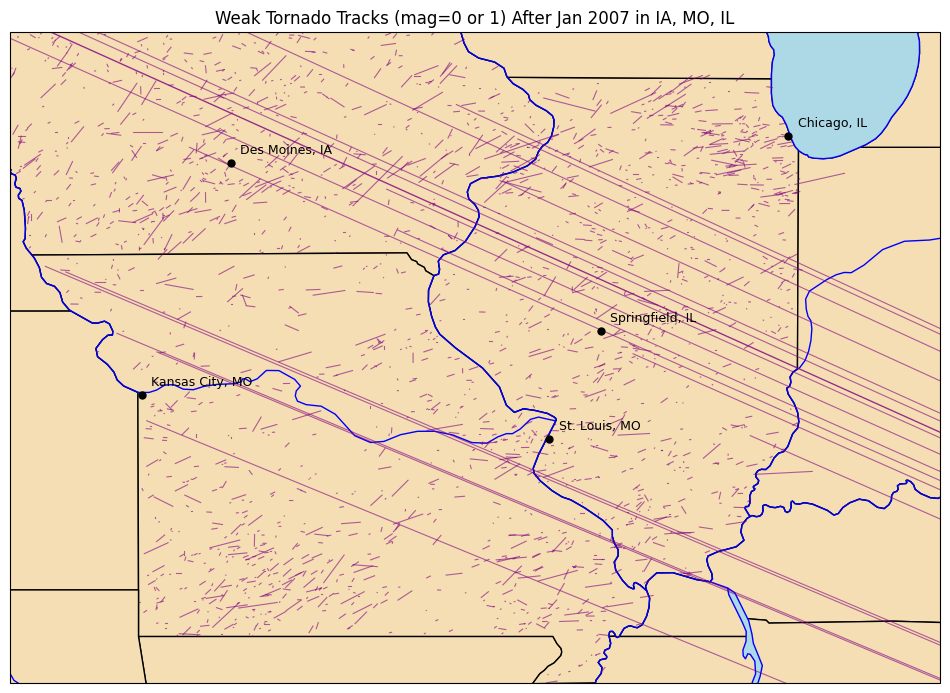

In [96]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Filter for tornadoes after January 2007 with mag = 0 or 1
weak_tornadoes = df_filtered[
    ((df_filtered["yr"] > 2007) | ((df_filtered["yr"] == 2007) & (df_filtered["mo"] > 1))) &
    (df_filtered["mag"].isin([0, 1]))
].dropna(subset=["slat", "slon", "elat", "elon"])

# Major cities (optional)
cities = {
    "Des Moines, IA": (41.5868, -93.6250),
    "Kansas City, MO": (39.0997, -94.5786),
    "St. Louis, MO": (38.6270, -90.1994),
    "Chicago, IL": (41.8781, -87.6298),
    "Springfield, IL": (39.7817, -89.6501)
}

# Set up the map
fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection=ccrs.PlateCarree())

# States with light fill
ax.add_feature(cfeature.STATES.with_scale("50m"), facecolor="wheat", edgecolor="black")
ax.add_feature(cfeature.BORDERS, linestyle=":")
ax.coastlines("50m")

# Rivers and lakes
rivers = cfeature.NaturalEarthFeature(
    category='physical', name='rivers_lake_centerlines', scale='50m', facecolor='none')
ax.add_feature(rivers, edgecolor='blue', linewidth=1)

lakes = cfeature.NaturalEarthFeature(
    category='physical', name='lakes', scale='50m', facecolor='lightblue')
ax.add_feature(lakes, edgecolor='blue')

# Plot weak tornado tracks
for _, row in weak_tornadoes.iterrows():
    ax.plot([row["slon"], row["elon"]],
            [row["slat"], row["elat"]],
            color="purple", linewidth=0.8, alpha=0.6,
            transform=ccrs.PlateCarree())

# Plot major cities
for city, (lat, lon) in cities.items():
    ax.plot(lon, lat, marker="o", color="black", markersize=5, transform=ccrs.PlateCarree())
    ax.text(lon + 0.1, lat + 0.1, city, fontsize=9, transform=ccrs.PlateCarree())

# Zoom to Midwest
ax.set_extent([-96, -86, 36, 43], crs=ccrs.PlateCarree())

plt.title("Weak Tornado Tracks (mag=0 or 1) After Jan 2007 in IA, MO, IL")
plt.show()